In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
data = pd.read_excel('knn-csc480-a4.xls', na_values=[' ']).set_index('Unnamed: 0')
cols = data.columns.tolist()
data.head()

,TRUE BELIEVER,THE DA VINCI CODE,THE WORLD IS FLAT,MY LIFE SO FAR,THE TAKING,THE KITE RUNNER,RUNNY BABBIT,HARRY POTTER
Unnamed: 0,,,,,,,,
U1,2.0,4.0,NaN,3.0,NaN,NaN,1.0,1.0
U2,NaN,5.0,NaN,NaN,3.0,2.0,1.0,NaN
U3,3.0,NaN,1.0,2.0,2.0,NaN,NaN,5.0
U4,NaN,3.0,NaN,NaN,4.0,1.0,NaN,3.0
U5,2.0,4.0,3.0,NaN,NaN,2.0,1.0,NaN


In [61]:
train = data.iloc[:20,:].values
train

array([[ 2.,  4., nan,  3., nan, nan,  1.,  1.],
       [nan,  5., nan, nan,  3.,  2.,  1., nan],
       [ 3., nan,  1.,  2.,  2., nan, nan,  5.],
       [nan,  3., nan, nan,  4.,  1., nan,  3.],
       [ 2.,  4.,  3., nan, nan,  2.,  1., nan],
       [ 5.,  4., nan,  3.,  1., nan,  3.,  1.],
       [ 1.,  4.,  5.,  5.,  3., nan, nan,  4.],
       [ 2.,  2., nan, nan,  4.,  5.,  1., nan],
       [nan, nan,  4.,  2.,  1., nan, nan,  5.],
       [ 3.,  5.,  1., nan, nan, nan,  4.,  4.],
       [ 2., nan,  2.,  4., nan,  1., nan,  2.],
       [ 5.,  4., nan,  2., nan,  1.,  1.,  3.],
       [nan, nan,  2., nan,  4., nan,  4.,  5.],
       [nan,  1.,  2.,  3.,  4., nan,  5.,  5.],
       [nan,  3., nan, nan,  5.,  3., nan,  2.],
       [nan,  3.,  2.,  1.,  1., nan,  4., nan],
       [ 1.,  5.,  1.,  2., nan,  4., nan,  4.],
       [ 5., nan,  4., nan,  2.,  1.,  3.,  5.],
       [nan,  3., nan,  2., nan,  4.,  1.,  4.],
       [ 2.,  5.,  1.,  1.,  5.,  4., nan,  4.]])

In [62]:
test = data.iloc[21:,:].values
test

array([[ 4., nan,  5.,  3.,  2.,  3., nan,  4.],
       [nan,  5.,  2.,  5.,  3., nan,  2., nan],
       [ 2.,  1., nan, nan,  2.,  3.,  4.,  1.],
       [ 3.,  5.,  1.,  1., nan,  1., nan,  3.],
       [nan,  2.,  3.,  2.,  1., nan,  3., nan]])

In [25]:
print(train.shape, test.shape)

(20, 8) (5, 8)


In [26]:
def correlation(x,y):
    x2 = x - x.mean()
    y2 = y - y.mean()
    return np.sum(x2*y2)/np.sqrt(np.sum(x2**2))/np.sqrt(np.sum(y2**2))

In [63]:
def predict(train, testrow, item, k):

    train_valid = train[~np.isnan(train[:,item]),:].copy()  # get valid training data that item is not nan
  
    testrow = testrow.copy() 
    
    test_excluded = np.delete(testrow, item)              # delete the item column that you will predict 
    train_excluded = np.delete(train_valid, item, axis=1)
    
    test_excluded = np.nan_to_num(test_excluded)         # change nan to zero
    train_excluded = np.nan_to_num(train_excluded)
    
    corr = []
       
    for i in range(train_excluded.shape[0]):
        corr.append(correlation(test_excluded,train_excluded[i])) # compute the value between train data and test data
    corr = np.array(corr)
    indx = np.argsort(corr)[-k:]

    pred = np.sum(corr[indx]*train_valid[indx,item])/np.sum(corr[indx]) # fomular from lecture slide
                        
    return pred

In [81]:
testrow1 = test[0].copy()
item1 = 0

In [82]:
train_valid1 = train[~np.isnan(train[:,item1]),:].copy()
train_valid1

array([[ 2.,  4., nan,  3., nan, nan,  1.,  1.],
       [ 3., nan,  1.,  2.,  2., nan, nan,  5.],
       [ 2.,  4.,  3., nan, nan,  2.,  1., nan],
       [ 5.,  4., nan,  3.,  1., nan,  3.,  1.],
       [ 1.,  4.,  5.,  5.,  3., nan, nan,  4.],
       [ 2.,  2., nan, nan,  4.,  5.,  1., nan],
       [ 3.,  5.,  1., nan, nan, nan,  4.,  4.],
       [ 2., nan,  2.,  4., nan,  1., nan,  2.],
       [ 5.,  4., nan,  2., nan,  1.,  1.,  3.],
       [ 1.,  5.,  1.,  2., nan,  4., nan,  4.],
       [ 5., nan,  4., nan,  2.,  1.,  3.,  5.],
       [ 2.,  5.,  1.,  1.,  5.,  4., nan,  4.]])

In [83]:
testrow1

array([ 4., nan,  5.,  3.,  2.,  3., nan,  4.])

In [84]:
test_excluded1 = np.delete(testrow1,item1)
test_excluded1

array([nan,  5.,  3.,  2.,  3., nan,  4.])

In [85]:
train_valid1 = train[~np.isnan(train[:,item1]),:].copy()
    
testrow1 = testrow1.copy()
test_excluded1 = np.delete(testrow1, item1)

train_excluded1 = np.delete(train_valid1, item1, axis=1)

test_excluded1 = np.nan_to_num(test_excluded1)
train_excluded1 = np.nan_to_num(train_excluded1)

In [86]:
train_excluded1

array([[4., 0., 3., 0., 0., 1., 1.],
       [0., 1., 2., 2., 0., 0., 5.],
       [4., 3., 0., 0., 2., 1., 0.],
       [4., 0., 3., 1., 0., 3., 1.],
       [4., 5., 5., 3., 0., 0., 4.],
       [2., 0., 0., 4., 5., 1., 0.],
       [5., 1., 0., 0., 0., 4., 4.],
       [0., 2., 4., 0., 1., 0., 2.],
       [4., 0., 2., 0., 1., 1., 3.],
       [5., 1., 2., 0., 4., 0., 4.],
       [0., 4., 0., 2., 1., 3., 5.],
       [5., 1., 1., 5., 4., 0., 4.]])

In [87]:
test_excluded1

array([0., 5., 3., 2., 3., 0., 4.])

In [89]:
corr = [] # for Pearson Correlation Coefficient
       
for i in range(train_excluded1.shape[0]):
    corr.append(correlation(test_excluded1,train_excluded1[i]))
corr = np.array(corr)
indx1 = np.argsort(corr)[-k:]
indx1
np.sum(corr[indx1]*train_valid1[indx1,item1])/np.sum(corr[indx1])

2.7150994108051996

### Part 1

In [90]:
actual = []
predicted = []
k = 3
for i in range(5):
    items = np.where(~np.isnan(test[i]))[0] # it's not NaN,
    for item in items:
        actual.append(test[i][item])
        predicted.append(predict(train, test[i], item, k))
print('MAE:', np.mean(abs(np.array(actual) - np.array(predicted))))     

MAE: 1.129545056919089


### Part 2

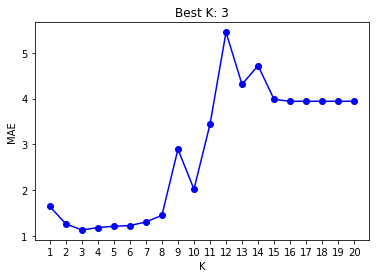

In [91]:
k_list = []
mae_list = []
for k in range(1, 21):
    k_list.append(k)
    actual = []
    predicted = []
    for i in range(5):
        items = np.where(~np.isnan(test[i]))[0]
        for item in items:
            actual.append(test[i][item])
            predicted.append(predict(train, test[i], item, k))
    mae = np.mean(abs(np.array(actual) - np.array(predicted)))
    mae_list.append(mae)
    
plt.plot(k_list, mae_list, 'bo-')
plt.xlabel('K')
plt.ylabel('MAE')
plt.title('Best K: {}'.format(k_list[np.argmin(mae_list)]))
plt.xticks(range(1,21));

In [92]:
pd.DataFrame({'K': k_list, 'MAE': mae_list})

,K,MAE
0,1,1.642857
1,2,1.260965
2,3,1.129545
3,4,1.179924
4,5,1.209557
5,6,1.224161
6,7,1.303741
7,8,1.448248
8,9,2.893274
9,10,2.018892


### Part 3

In [93]:
k = 3
predicted = []
print('{0:<5}  {1:<18} {2:4}'.format('User', 'Book', 'Score'))
print('-'*34)
for i in range(2):
    items = np.where(np.isnan(test[i]))[0]
    for item in items:
        print('NU{0:<5} {1:<18} {2:.4f}'.format(i+1, cols[item], predict(train, test[i], item, k)))

User   Book               Score
----------------------------------
NU1     THE DA VINCI CODE  4.3017
NU1     RUNNY BABBIT       3.4151
NU2     TRUE BELIEVER      2.8807
NU2     THE KITE RUNNER    2.6585
NU2     HARRY POTTER       3.1468


### Part 4

In [94]:
def recommender(train, user, k, m):
    items = np.where(np.isnan(train[user]))[0] 
    train_aug = np.delete(train, user, axis=0)
    scores = [] 
    for item in items:
        scores.append((predict(train_aug, train[user], item, k), cols[item]))
        
    scores = sorted(scores, reverse=True)
    return scores[:m]

In [95]:
recommender(train, 1, 4, 2)

[(3.198936550823134, 'HARRY POTTER'), (2.5367845523049892, 'TRUE BELIEVER')]

In [96]:
k = 4
m = 3
print('{0:<5}  {1:<18} {2:4}'.format('User', 'Book', 'Score'))
print('-'*34)
for i in [1, 4, 12, 19]:
    scores = recommender(train, i, k, m)
    for j in range(len(scores)):
        print('U{0:<5} {1:<18} {2:.4f}'.format(i+1, scores[j][1], scores[j][0]))

User   Book               Score
----------------------------------
U2     HARRY POTTER       3.1989
U2     TRUE BELIEVER      2.5368
U2     THE WORLD IS FLAT  1.8271
U5     HARRY POTTER       3.7899
U5     THE TAKING         3.2204
U5     MY LIFE SO FAR     2.1419
U13    TRUE BELIEVER      4.0202
U13    MY LIFE SO FAR     2.7266
U13    THE DA VINCI CODE  2.6847
U20    RUNNY BABBIT       1.4585
